In [ ]:
Clustering: K-Means 
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques 
if necessary.
Apply K-Means clustering algorithms (based on total_graduates) to find the group 
of customers

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cities_r2.csv')

In [3]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [8]:
numeric_data = data.drop(['name_of_city', 'state_name', 'location'], axis=1)

In [9]:
label_encoder = LabelEncoder()
data['name_of_city'] = label_encoder.fit_transform(data['name_of_city'])
data['state_name'] = label_encoder.fit_transform(data['state_name'])
data['location'] = label_encoder.fit_transform(data['location'])

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [11]:
X = scaled_data[:, numeric_data.columns.get_loc('total_graduates')]

In [12]:
X = X.reshape(-1, 1)

In [13]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [14]:
kmeans.fit(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

KMeans(n_clusters=3, random_state=42)

In [15]:
data['cluster'] = kmeans.labels_

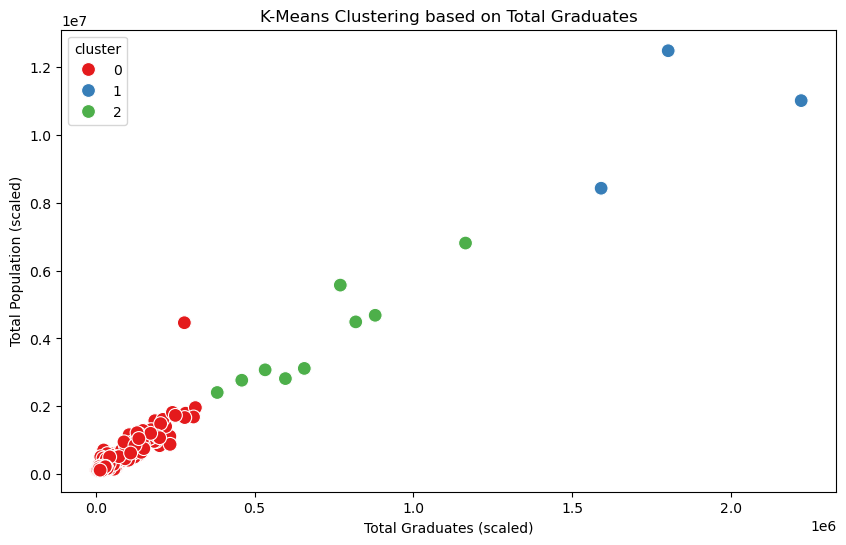

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_graduates', y='population_total', hue='cluster', data=data, palette='Set1', s=100)
plt.title('K-Means Clustering based on Total Graduates')
plt.xlabel('Total Graduates (scaled)')
plt.ylabel('Total Population (scaled)')
plt.show()